In [1]:
%load_ext autoreload
%autoreload 1
%aimport util

In [10]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from amuse.units import units

import util

In [3]:
f = h5py.File("data_reb_52.h5")
f.keys()

<KeysViewHDF5 ['Step#0', 'Step#1', 'Step#10', 'Step#11', 'Step#12', 'Step#13', 'Step#14', 'Step#15', 'Step#16', 'Step#17', 'Step#18', 'Step#19', 'Step#2', 'Step#20', 'Step#21', 'Step#3', 'Step#4', 'Step#5', 'Step#6', 'Step#7', 'Step#8', 'Step#9']>

In [4]:
s0 = f["Step#0"]
s0.keys()

<KeysViewHDF5 ['a', 'ecc', 'energy', 'hash', 'inc', 'mass', 'ptype', 'radius', 'time', 'vx', 'vy', 'vz', 'x', 'y', 'z']>

In [7]:
sorted_steps = util.sorted_steps(f)
hashes = sorted_steps[0]["hash"][0]
prop_table = util.prop_table(hashes)

# Mass growth over time (Figure 1 in IOPF VI)

![](images/figure-1.png)  

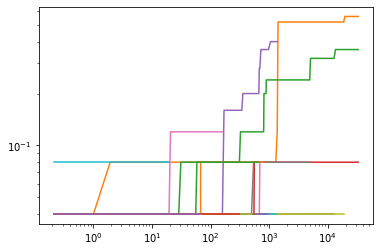

In [13]:
def plot_one_mass_growth_over_time(ax, p_hash, steps, **kwargs):
    mass = []
    time = []
    for step in steps:
        hashes = step["hash"][0]
        i, = np.where(np.isclose(hashes, p_hash))
        if i.size == 0:
            break
        mass.extend((step["mass"][:, i] | units.MSun).value_in(units.MEarth))
        time.extend(step["time"])
    ax.plot(time, mass, **kwargs)
    
fig, ax = plt.subplots()
for p_hash in hashes[1:]:
    plot_one_mass_growth_over_time(ax, p_hash, sorted_steps, **prop_table[p_hash])
ax.set_xscale('log')
ax.set_yscale('log')